In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# import file
filepath = "./data/car.csv"
names=['buying','maint','doors','persons','lug_boot','safety','acceptability']
dataset = pd.read_csv(filepath, names=names)

In [4]:
# get data info
dataset.head()


,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# data preprocessing
le = LabelEncoder()
data=dataset.apply(LabelEncoder().fit_transform) # Transform label to int

In [7]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [8]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [9]:
data.apply(lambda x:sum(x.isnull()),axis=0)

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

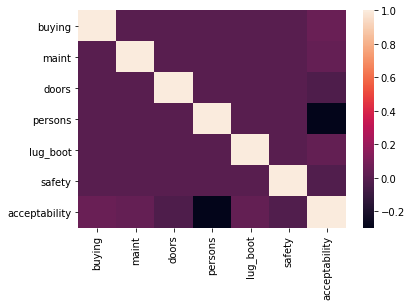

In [10]:
sns.heatmap(data.corr())

In [11]:
cov=np.cov(data['persons'],data['doors'])
bet=cov[1,0]/cov[0,0]

In [12]:
dv=data.values
np.random.shuffle(data.values)

In [13]:
split=int(0.80*data.shape[0])
X=dv[:,:6]
y=dv[:,6]
X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]
print(X_train.shape,y_train.shape)

(1382, 6) (1382,)


In [14]:
X=X.astype(int)
y=y.astype(int)

In [15]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

In [16]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.9797687861271677


In [17]:
kn = KNeighborsClassifier() 
kn.fit(X_train,y_train) 
print(kn.score(X_test,y_test))

0.9219653179190751


In [18]:
rf.feature_importances_

array([0.19117481, 0.15525895, 0.06743762, 0.22721388, 0.08748976,
       0.27142497])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,learning_curve

In [20]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')
logreg.fit(X_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                   intercept_scaling=1, max_iter=100, 
                   multi_class='ovr', n_jobs=1, 
                   penalty='l2', random_state=None, 
                   solver='newton-cg', tol=0.0001, 
                   verbose=0, warm_start=False)
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.6936416184971098

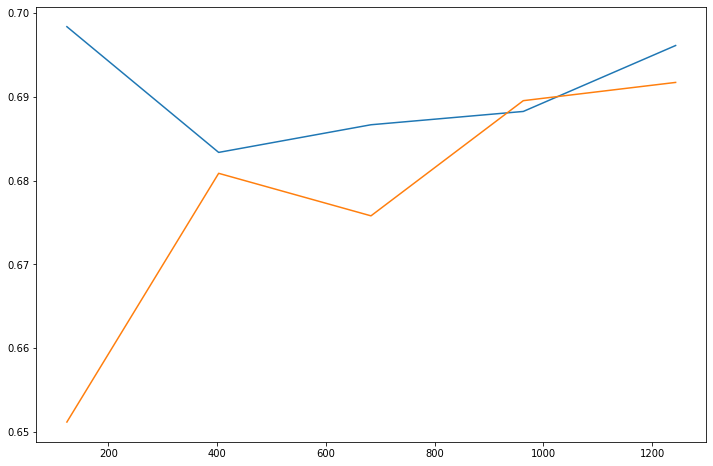

In [21]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1) 
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)] 
test_score=[lc[2][i].mean() for i in range (0,5)] 
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score) 
plt.plot(size,test_score)

In [22]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state =51),
param_grid=param_grid,cv=10,n_jobs=-1) 
grid.fit(X_train,y_train)
print(grid.best_params_) 
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'max_leaf_nodes': None}
0.9840840371181316
